# Data Visualisation And Analysis

I have worked on the data set which had information about the playstore data 

questions that have been answered in the below data analysis

- What are the top 10 most installed applications?
- How do application sizes vary across categories?
- How do the average ratings compare across different categories?
- What is the proportion of ad-supported applications in each category?
- How do the number of installs compare between applications that are editor's choice and those that are not?
- What is the average rating of applications in different categories?
- What is the correlation between application size and number of installations?
- Do higher-rated applications tend to have more reviews?
- Do more reviews mean more installs
- What is the relationship between the price of an application and its rating?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Play_Store_2.csv')

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000.0,Free,0.00,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000.0,Free,0.00,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000.0,Free,0.00,Everyone,Yes,No,No
3,Ay,Others,NaN,11.0,36.0,5000.0,Free,0.00,Teen,Yes,No,No
4,EA Plus,Others,2.5,12.0,12.0,1000.0,Free,0.00,Everyone,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4148,Home Pony 2,FAMILY,4.0,20977.0,26.0,1000000.0,Free,0.00,Everyone,Yes,No,No
4149,Realtor.com Real Estate: Homes for Sale and Rent,Others,4.5,162243.0,12.0,10000000.0,Free,0.00,Everyone,Yes,No,No
4150,Uber Eats: Food Delivery,Others,4.3,312204.0,270.0,19970000.0,Free,0.00,Everyone,Yes,No,Yes
4151,Faraway 4: Ancient Escape,Others,4.3,12207.0,270.0,1000000.0,Free,0.00,Everyone,Yes,Yes,Yes


In [4]:
data.shape

(4153, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


In [6]:
data.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,4153,4153,Jump'N'Shoot Attack,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4153,15,Others,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3976.0,NaN,NaN,NaN,4.189487,0.519792,1.0,4.0,4.3,4.5,5.0
Reviews,4029.0,NaN,NaN,NaN,66964.206751,107418.85154,1.0,224.0,7461.0,78219.0,312204.0
Size,4153.0,NaN,NaN,NaN,82.254408,92.256334,0.011,22.0,42.0,84.0,270.0
Installs,4153.0,NaN,NaN,NaN,3232705.641946,5421343.284861,1.0,10000.0,500000.0,5000000.0,19970000.0
Paid/Free,4153,2,Free,3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4153.0,NaN,NaN,NaN,0.565341,8.926313,0.0,0.0,0.0,0.0,399.99
Content Rating,4153,4,Everyone,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,4153,2,Yes,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'BUSINESS'),
  Text(2, 0, 'BOOKS_AND_REFERENCE'),
  Text(3, 0, 'TOOLS'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'PRODUCTIVITY'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'LIFESTYLE'),
  Text(11, 0, 'COMMUNICATION'),
  Text(12, 0, 'MEDICAL'),
  Text(13, 0, 'SPORTS'),
  Text(14, 0, 'PHOTOGRAPHY')])

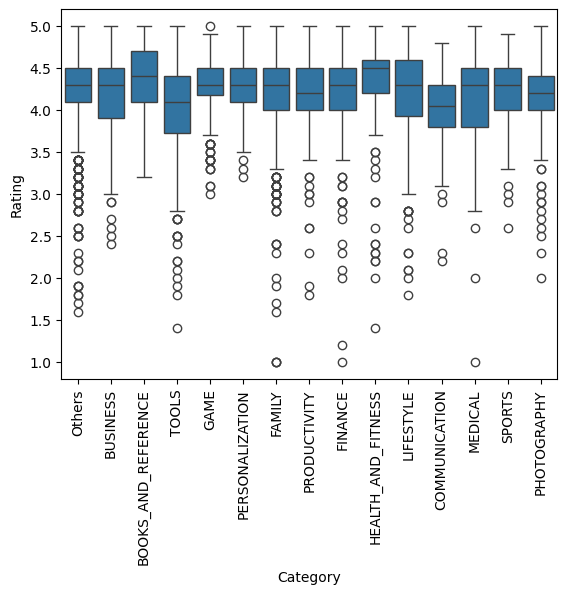

In [8]:
sns.boxplot(x='Category',y='Rating',data=data)
plt.xticks(rotation=90)

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\30980015.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category',data=data,palette="pastel")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'BUSINESS'),
  Text(2, 0, 'BOOKS_AND_REFERENCE'),
  Text(3, 0, 'TOOLS'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'PRODUCTIVITY'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'LIFESTYLE'),
  Text(11, 0, 'COMMUNICATION'),
  Text(12, 0, 'MEDICAL'),
  Text(13, 0, 'SPORTS'),
  Text(14, 0, 'PHOTOGRAPHY')])

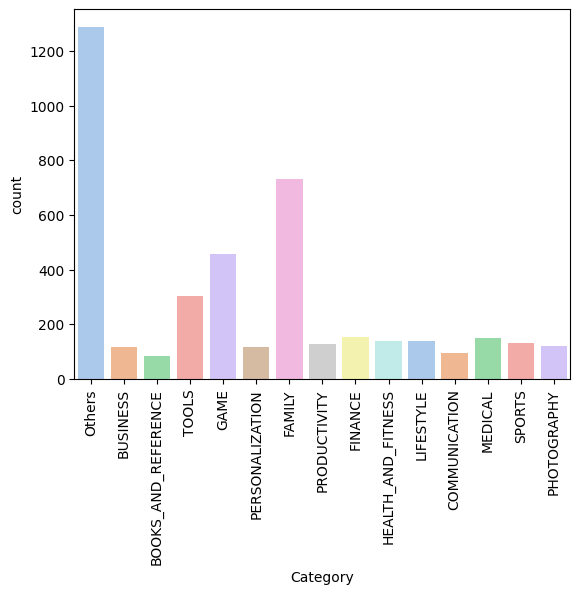

In [9]:
sns.countplot(x='Category',data=data,palette="pastel")
plt.xticks(rotation=90)

<Axes: xlabel='Rating', ylabel='Count'>

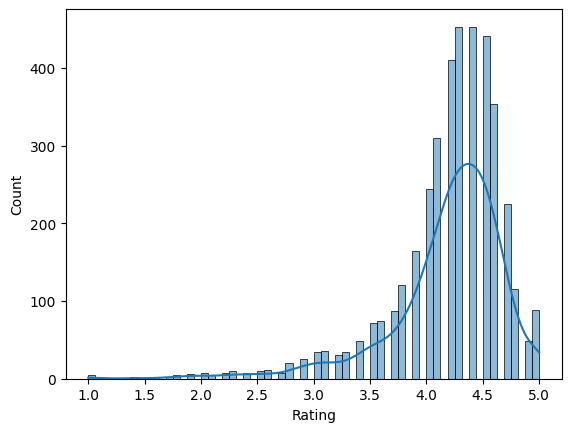

In [10]:
sns.histplot(x='Rating',data=data,kde=True)

<Axes: xlabel='Size', ylabel='Count'>

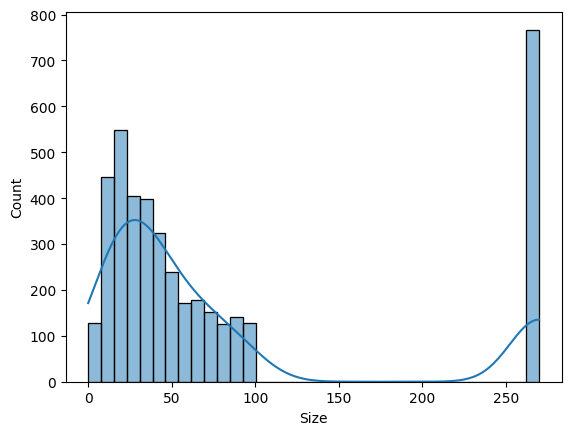

In [11]:
sns.histplot(x='Size',data=data,kde=True)

<Axes: xlabel='Size'>

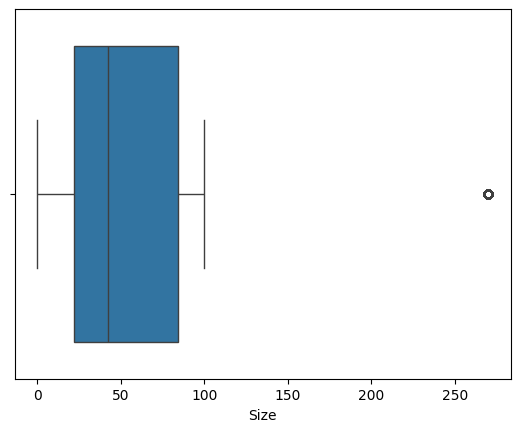

In [12]:
sns.boxplot(x='Size',data=data)

In [13]:
data['Rating'].mean()

np.float64(4.189486921529175)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'BUSINESS'),
  Text(2, 0, 'BOOKS_AND_REFERENCE'),
  Text(3, 0, 'TOOLS'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'PRODUCTIVITY'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'LIFESTYLE'),
  Text(11, 0, 'COMMUNICATION'),
  Text(12, 0, 'MEDICAL'),
  Text(13, 0, 'SPORTS'),
  Text(14, 0, 'PHOTOGRAPHY')])

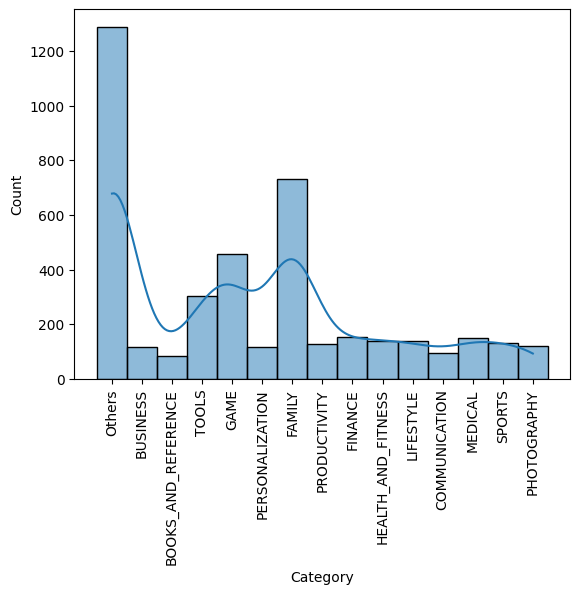

In [14]:
sns.histplot(x='Category',data=data,kde=True)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'BUSINESS'),
  Text(2, 0, 'BOOKS_AND_REFERENCE'),
  Text(3, 0, 'TOOLS'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'PRODUCTIVITY'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'LIFESTYLE'),
  Text(11, 0, 'COMMUNICATION'),
  Text(12, 0, 'MEDICAL'),
  Text(13, 0, 'SPORTS'),
  Text(14, 0, 'PHOTOGRAPHY')])

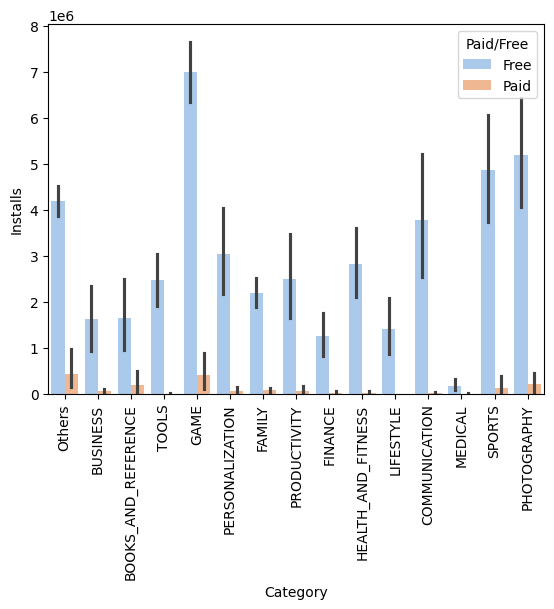

In [15]:
sns.barplot(x='Category',y='Installs',data=data,palette="pastel",hue='Paid/Free')
plt.xticks(rotation=90)

# Treating missing vales

<Axes: xlabel='Rating', ylabel='Count'>

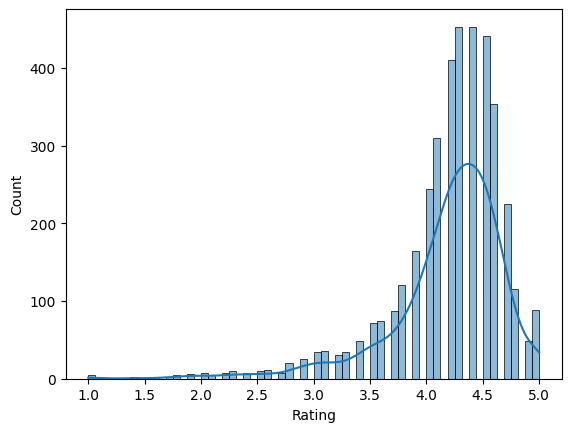

In [16]:
sns.histplot(x='Rating',data=data,kde=True)

In [17]:
data.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

In [18]:
data['Rating']=data['Rating'].fillna(value=data['Rating'].mean())

In [19]:
data.isnull().sum()

App                   0
Category              0
Rating                0
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

<Axes: xlabel='Rating'>

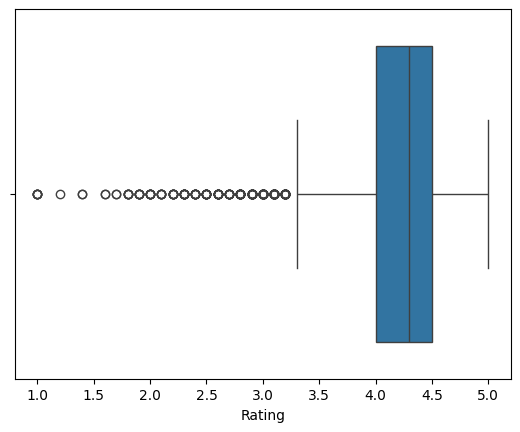

In [20]:
sns.boxplot(x='Rating',data=data)

<Axes: xlabel='Reviews', ylabel='Count'>

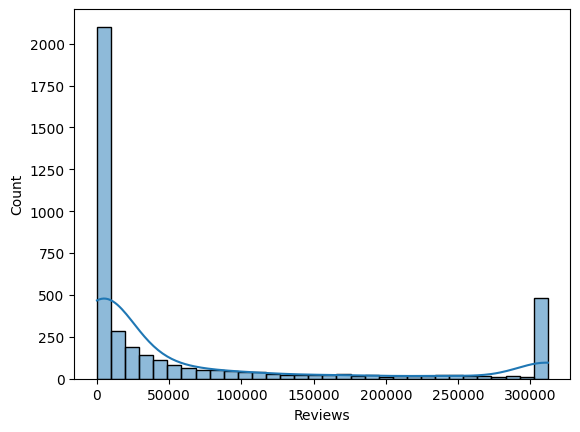

In [21]:
sns.histplot(x='Reviews',data=data,kde=True)

In [22]:
data["Reviews"]=data["Reviews"].fillna(value=data["Reviews"].median())

In [23]:
data.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

now we have zero null values

# Checking Duplicate Values

In [24]:
data.duplicated().sum()

np.int64(0)

we can see that we dont have any duplicate values in our data

# Observing Numerical Values

In [25]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Paid/Free',
       'Price', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

reviewing the rating 

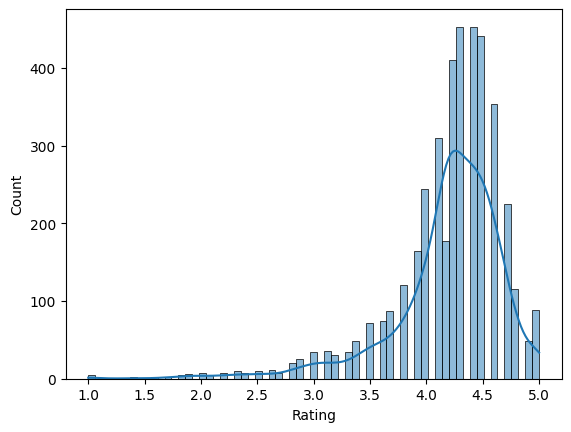

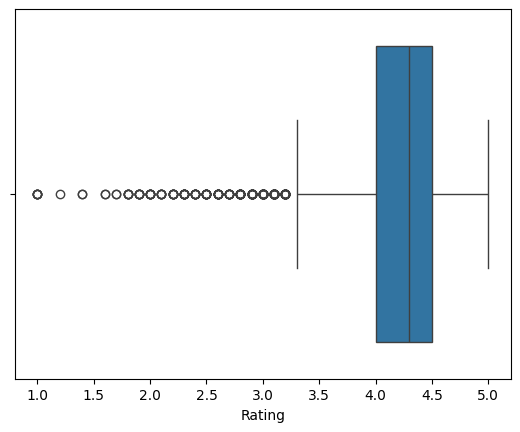

In [26]:
sns.histplot(x='Rating',data=data,kde=True)
plt.show()
sns.boxplot(x='Rating',data=data)
plt.show()

- here we have left skewed data distribution
- we have maximum values in higher side
- here we have many outliers

now we will analysis review 

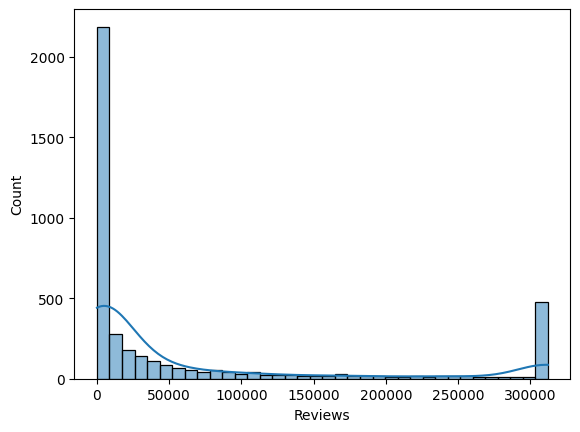

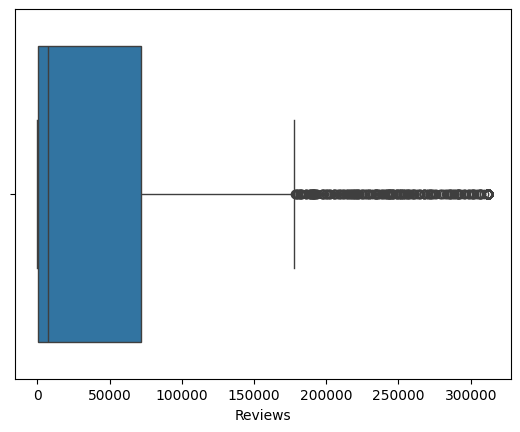

In [27]:
sns.histplot(x='Reviews',data=data,kde=True)
plt.show()
sns.boxplot(x='Reviews',data=data)
plt.show()

- here we have many outliers
- most of the data lies in less values
- here we have right skwed data distribution

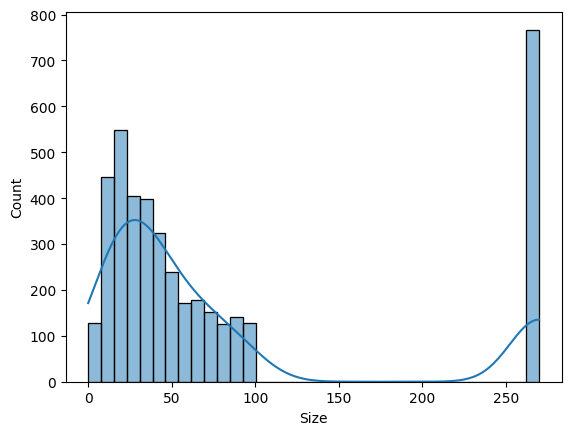

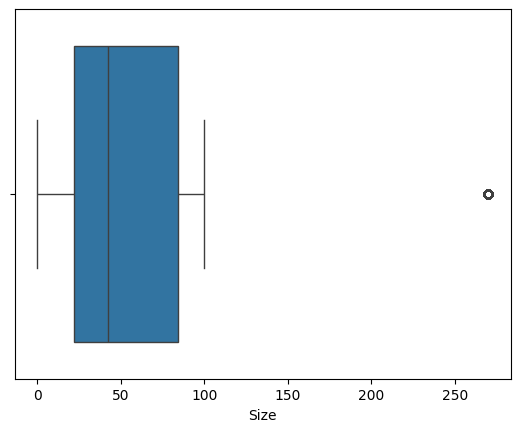

In [28]:
sns.histplot(x='Size',data=data,kde=True)
plt.show()
sns.boxplot(x='Size',data=data)
plt.show()

- here we have only one outlier
- most data lies in 0-100 that means most of the app size is of this range
- here we have right skewd data

anaylsis installs

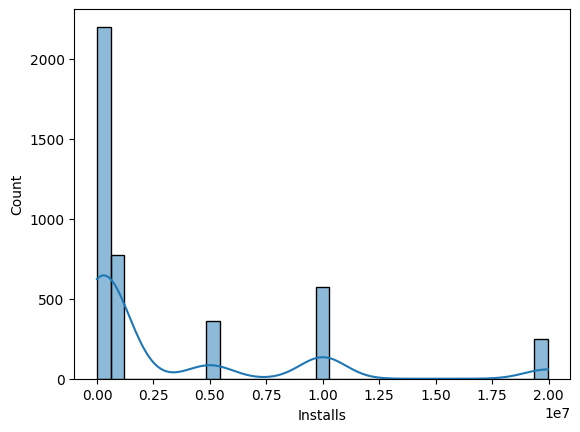

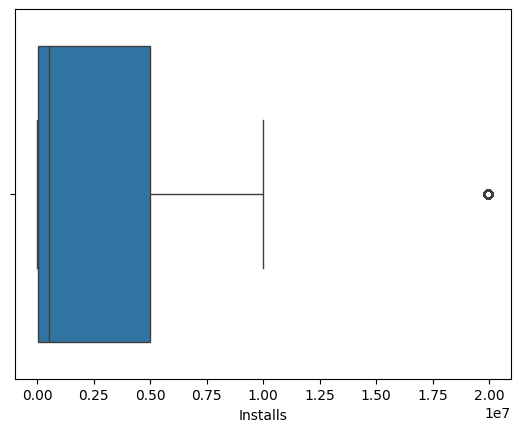

In [29]:
sns.histplot(x='Installs',data=data,kde=True)
plt.show()
sns.boxplot(x='Installs',data=data)
plt.show()

- here we have unequal distribution that is apps are installed randomly
- 

analysing price

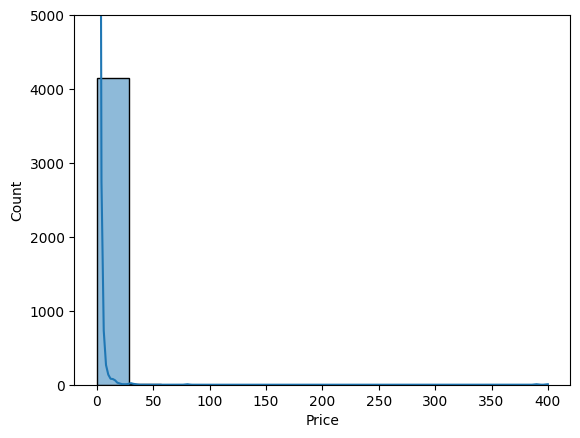

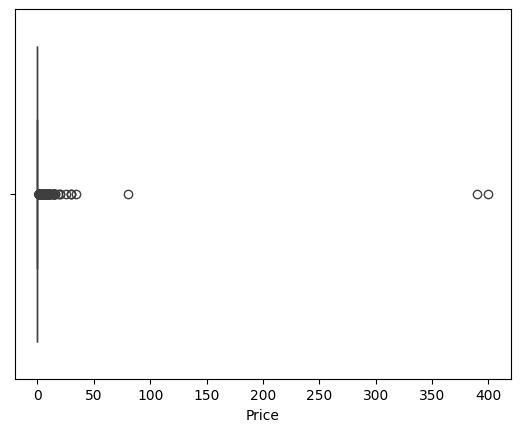

In [30]:
plt.ylim(0,5000)
sns.histplot(x='Price',data=data,kde=True)
plt.show()
sns.boxplot(x='Price',data=data)
plt.show()

- we have some ouliers
- as we can say most of the apps have zero price 

# lets explore categorical column

In [31]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Paid/Free',
       'Price', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\759362366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category',data=data,palette="dark")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Others'),
  Text(1, 0, 'BUSINESS'),
  Text(2, 0, 'BOOKS_AND_REFERENCE'),
  Text(3, 0, 'TOOLS'),
  Text(4, 0, 'GAME'),
  Text(5, 0, 'PERSONALIZATION'),
  Text(6, 0, 'FAMILY'),
  Text(7, 0, 'PRODUCTIVITY'),
  Text(8, 0, 'FINANCE'),
  Text(9, 0, 'HEALTH_AND_FITNESS'),
  Text(10, 0, 'LIFESTYLE'),
  Text(11, 0, 'COMMUNICATION'),
  Text(12, 0, 'MEDICAL'),
  Text(13, 0, 'SPORTS'),
  Text(14, 0, 'PHOTOGRAPHY')])

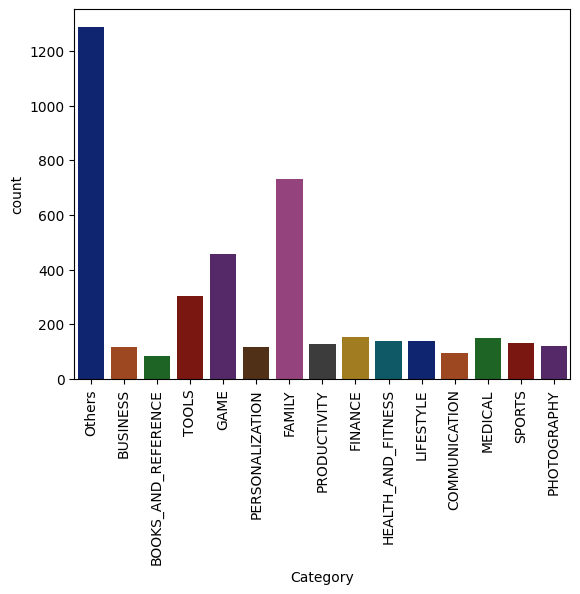

In [32]:
sns.countplot(x='Category',data=data,palette="dark")
plt.xticks(rotation=90)

- here we can say that the most number of app category are from others and then family and games
- the least number of app are in books and reference

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\802858739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Paid/Free',data=data,palette="pastel")


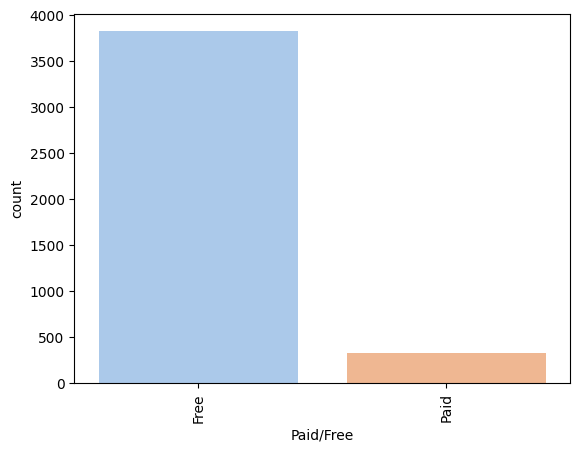

In [33]:
plt.xticks(rotation=90)
sns.countplot(x='Paid/Free',data=data,palette="pastel")
plt.show()

- here we can see that thier are more number of free apps and less paid apps

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\2265321389.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Content Rating',data=data,palette="dark")


<Axes: xlabel='Content Rating', ylabel='count'>

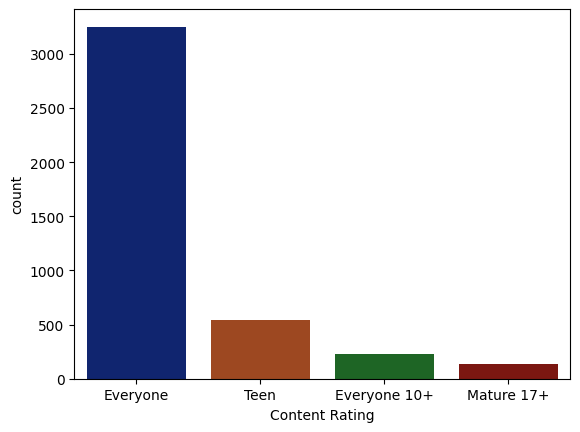

In [34]:
sns.countplot(x='Content Rating',data=data,palette="dark")

- most of the apps are for everyone
- almost 19% pf the apps are for teens
- 10% of apps are for 10+ people
- 5-6% of aaps are for mature 17% people

**observing ad support**

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\1315333468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ad Supported',data=data,palette="dark")


<Axes: xlabel='Ad Supported', ylabel='count'>

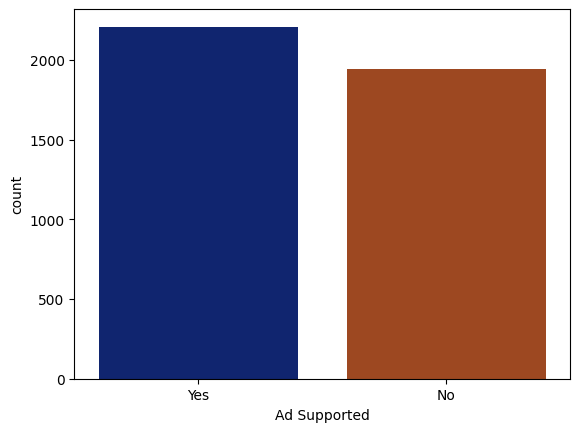

In [35]:
sns.countplot(x='Ad Supported',data=data,palette="dark")

- almost 88% apps are add suported

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\2523948651.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='In App Purchases',data=data,palette="dark")


<Axes: xlabel='In App Purchases', ylabel='count'>

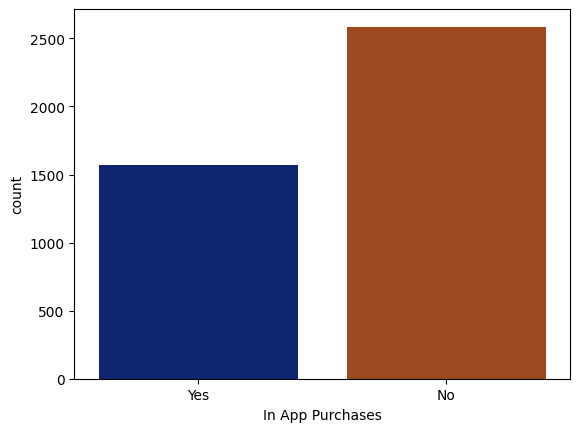

In [36]:
sns.countplot(x='In App Purchases',data=data,palette="dark")

- here we have significant difference between in app purchased 
- most of the apps do not have in app purchases

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\513055516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Editors Choice',data=data,palette="dark")


<Axes: xlabel='Editors Choice', ylabel='count'>

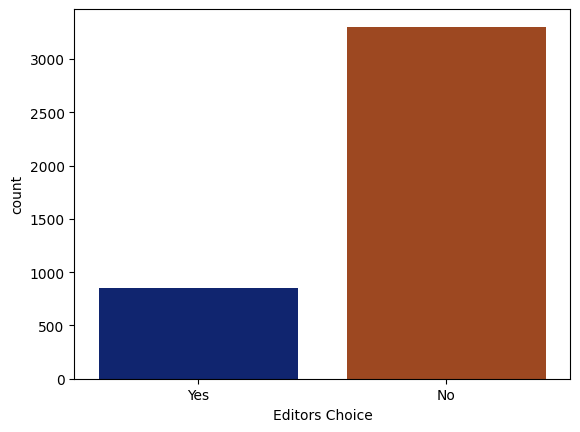

In [37]:
sns.countplot(x='Editors Choice',data=data,palette="dark")

- more than 50% of apps are not of editord choice

# Bivariate Analysis


Let's check relationship of categories with ratings and reviews as to know which category is trending

In [38]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Paid/Free',
       'Price', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\3580172556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',y='Rating',data=data,palette="pastel")


<function matplotlib.pyplot.show(close=None, block=None)>

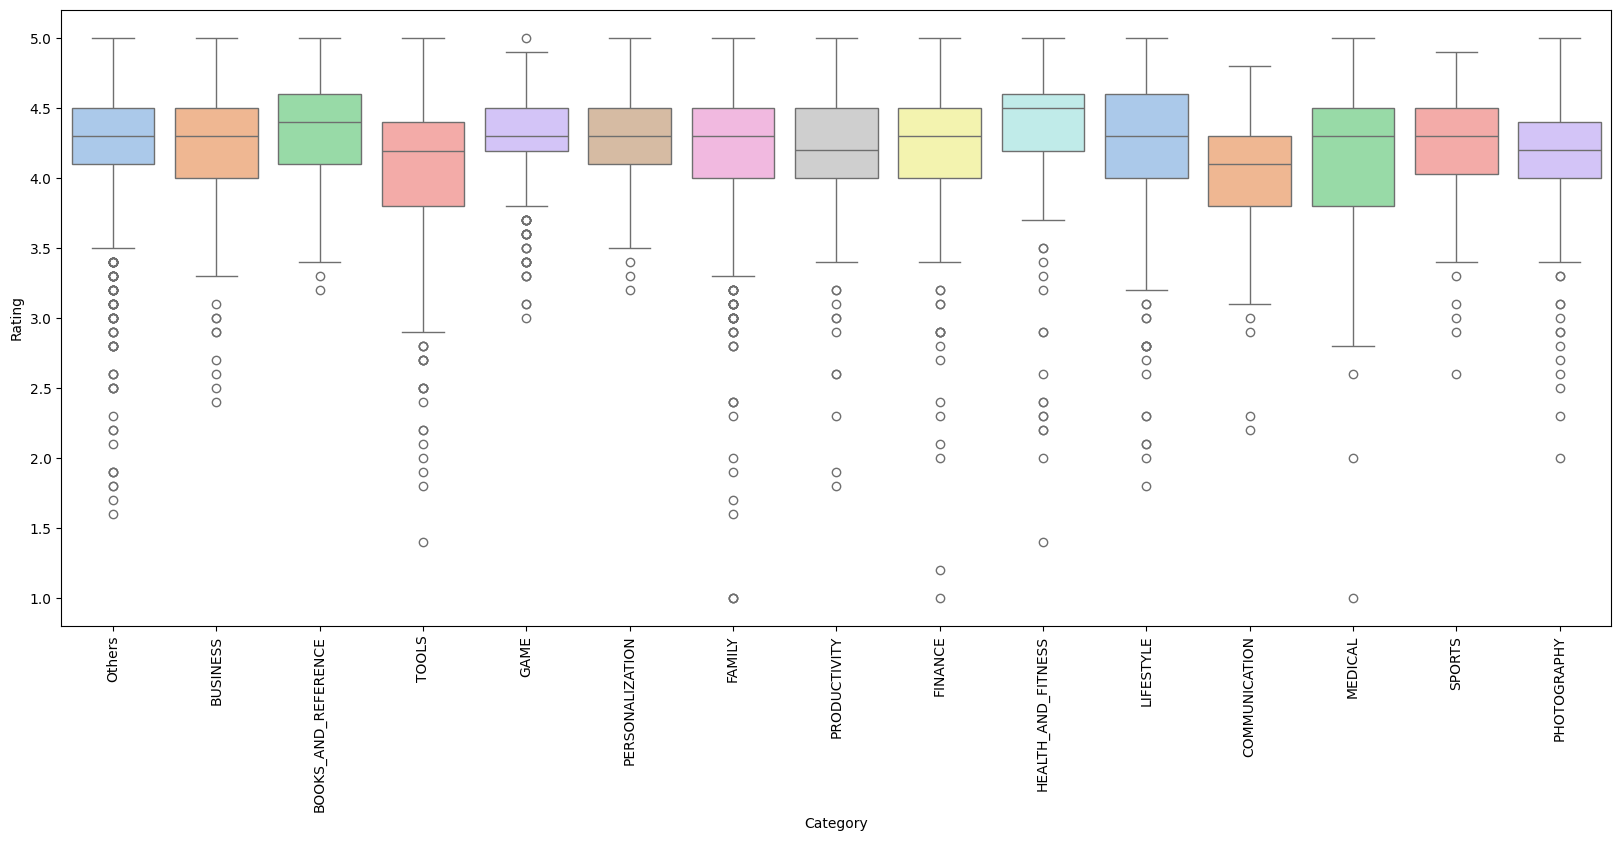

In [39]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.boxplot(x='Category',y='Rating',data=data,palette="pastel")
plt.show

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\3401199528.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Category',y='Rating',ci=False,data=data,estimator = 'sum')


<function matplotlib.pyplot.show(close=None, block=None)>

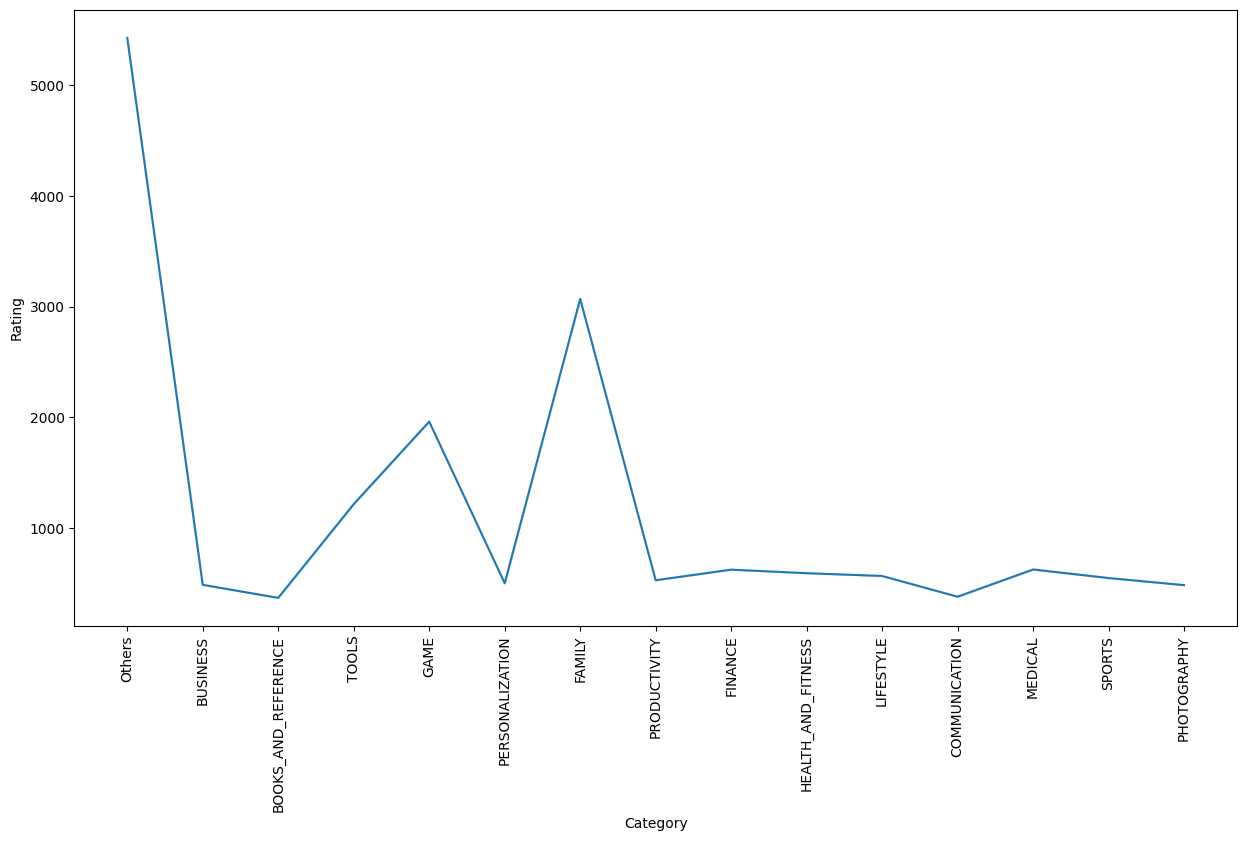

In [40]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x='Category',y='Rating',ci=False,data=data,estimator = 'sum')
plt.show

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\2661081617.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Category',y='Reviews',ci=False,data=data,estimator = 'sum')


<function matplotlib.pyplot.show(close=None, block=None)>

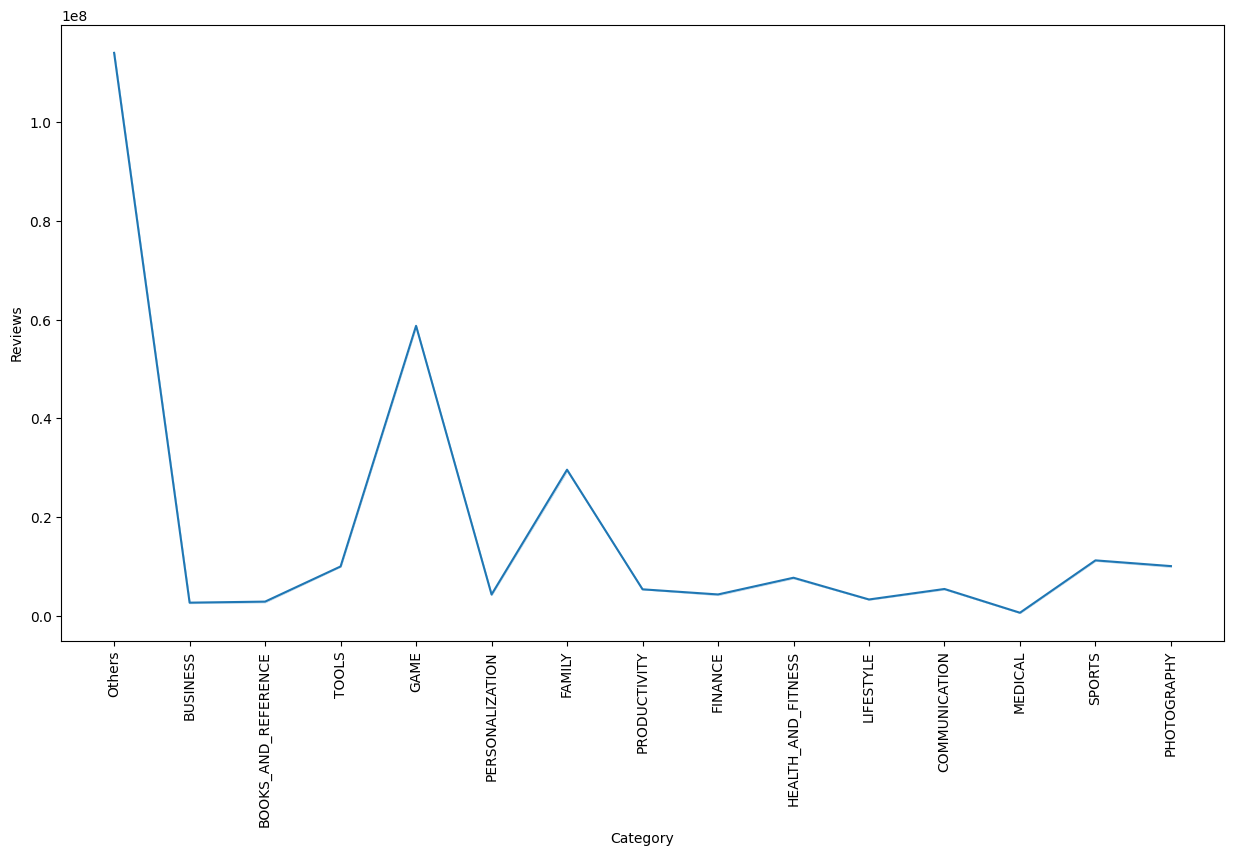

In [41]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x='Category',y='Reviews',ci=False,data=data,estimator = 'sum')
plt.show

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\952068728.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Category',y='Installs',ci=False,data=data,estimator = 'sum')


<function matplotlib.pyplot.show(close=None, block=None)>

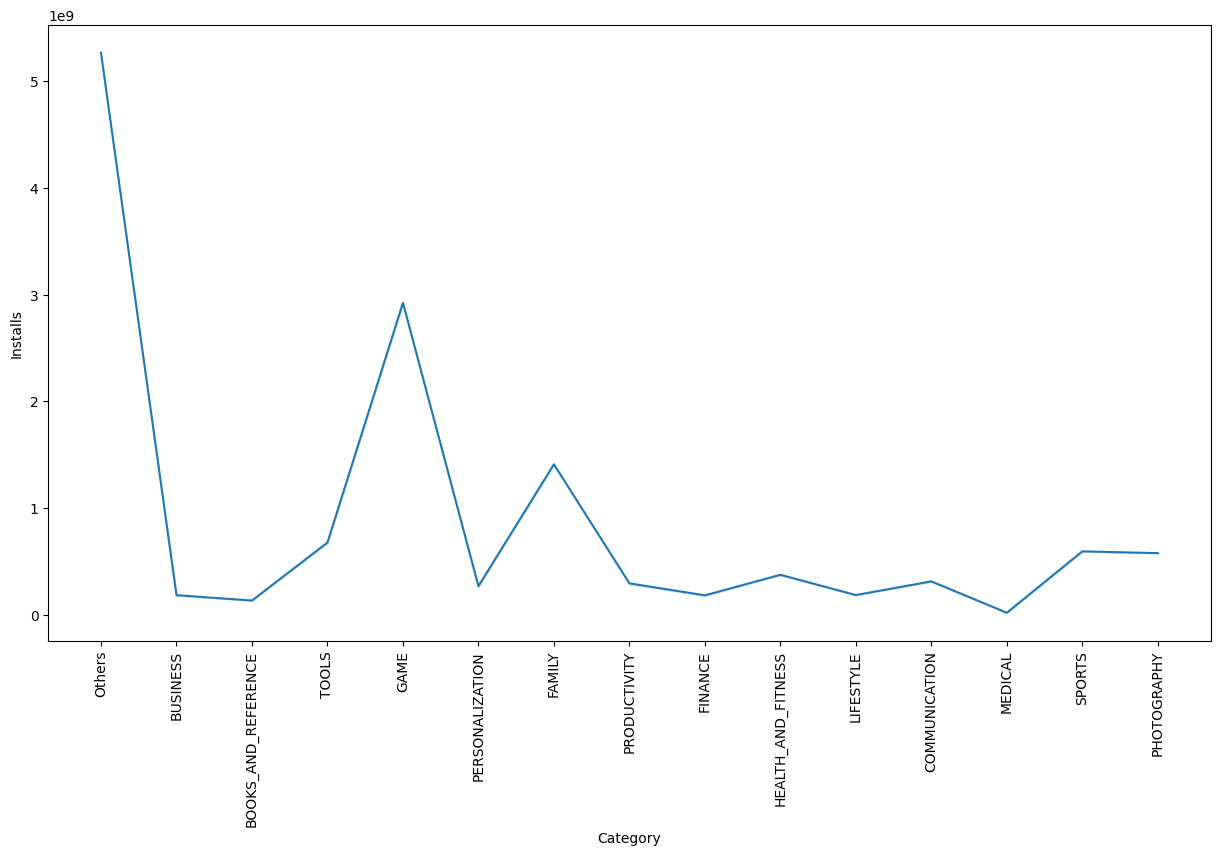

In [42]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x='Category',y='Installs',ci=False,data=data,estimator = 'sum')
plt.show

- The trend of installation of apps is almost same as for the Reviews in apps
- Apps present in category Game has been installed more number of times than any other Category except those apps which are under Others Category
- Apps in Medical Category are installed least followed by Finance, Business and Books and References

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\1875018823.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(x='Category',y='Price',ci=False,data=data,estimator = 'sum')


<function matplotlib.pyplot.show(close=None, block=None)>

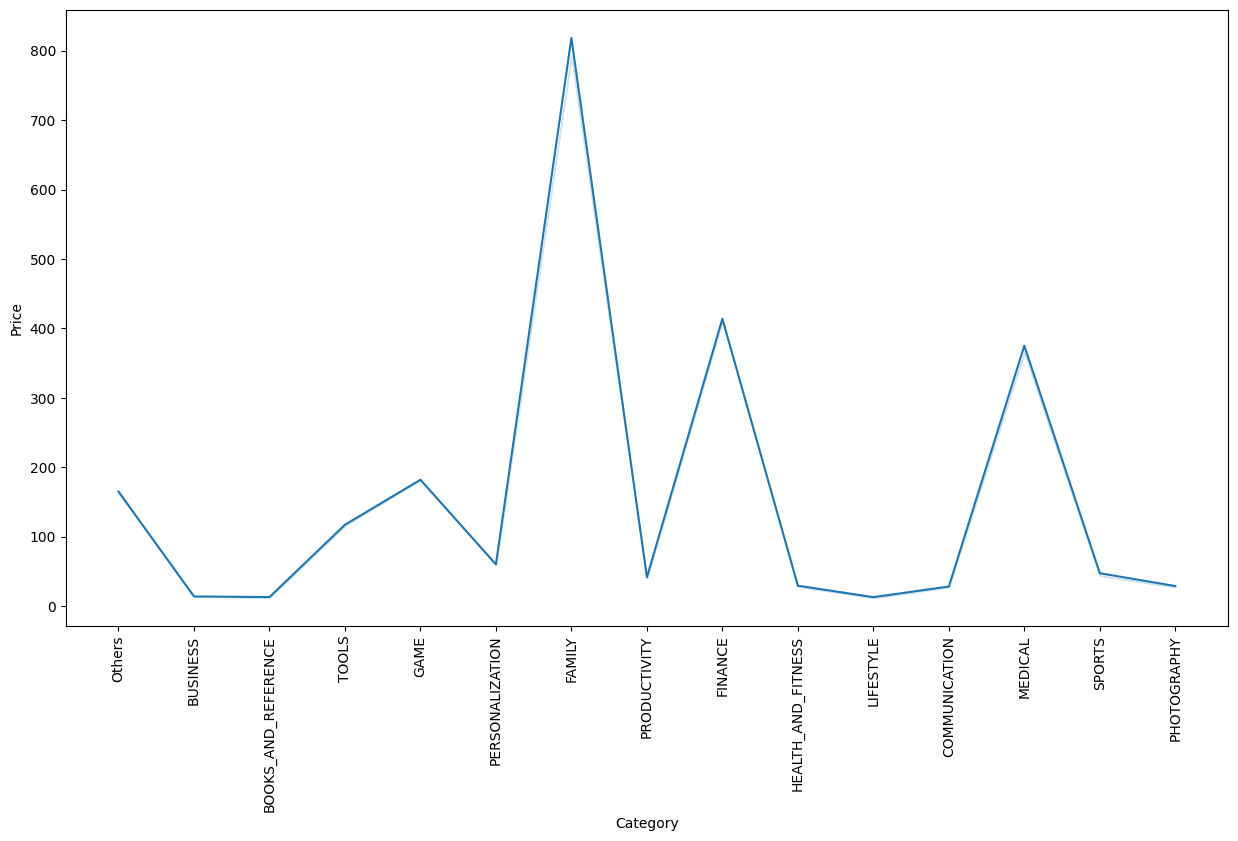

In [43]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x='Category',y='Price',ci=False,data=data,estimator = 'sum')
plt.show

- Apps present in Family Category are costliest as compared to any other Category
- Even though the apps under Family category are costlier, the installation of these apps is higher than other apps except for Others and Game Category
- It is interesting to observe that Apps under Finance and Medical categroy are also costlier, and this can be the reason that these apps are installed in a very less frequency
- Business and Books and References apps are not costlier and they are not been installed by the users, which means the apps present in these categories are least preferred by the users

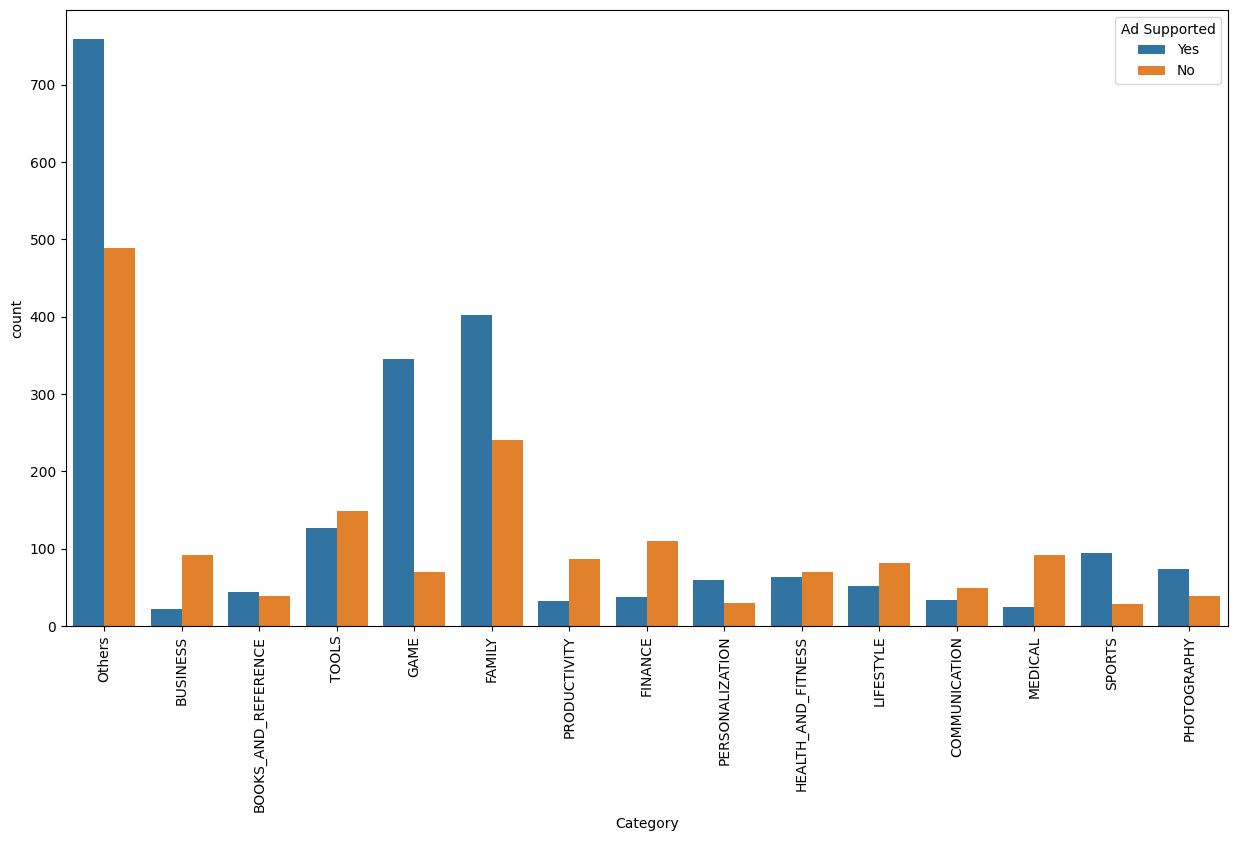

In [44]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = data[data['Paid/Free'] == 'Free'] , x = 'Category' , hue = 'Ad Supported');


<Axes: xlabel='Category', ylabel='count'>

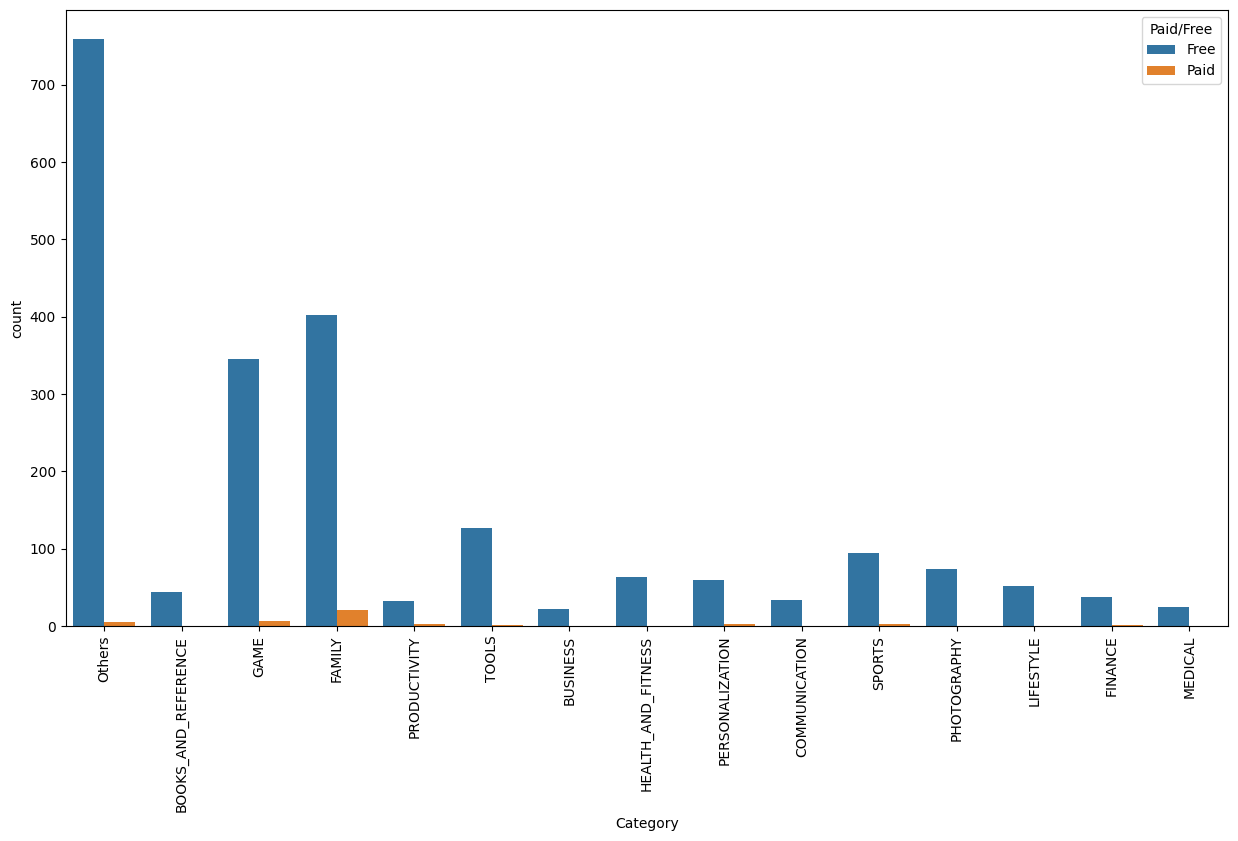

In [45]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = data[data['Ad Supported'] == 'Yes'], x = 'Category' ,hue = 'Paid/Free')

- here we can see that most of the ad supported apps are free
- family category app have most number of paid app that support ad followed by game and others

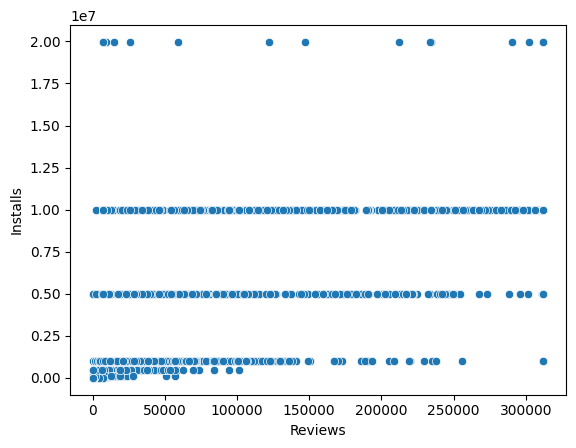

In [46]:
sns.scatterplot(data = data , x = 'Reviews' , y = 'Installs');

# Recomandation 


C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\1333865363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='App' ,data=top10 ,palette="dark")


<Axes: xlabel='App', ylabel='count'>

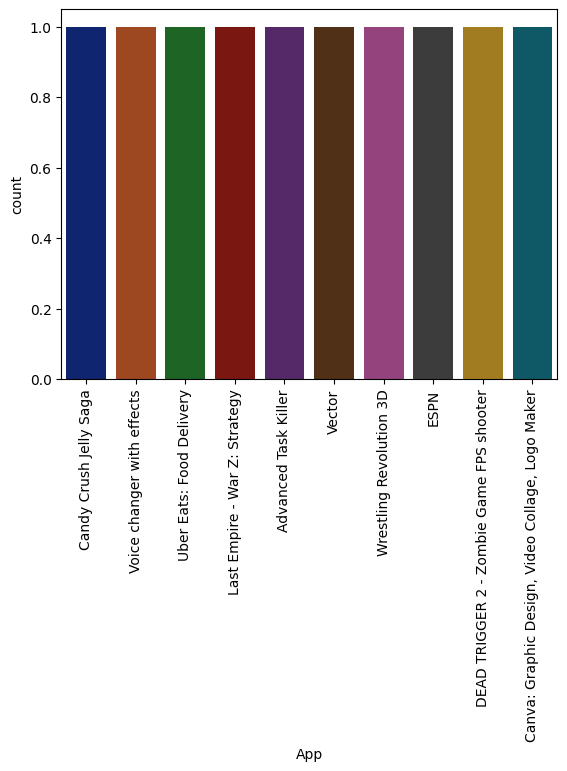

In [47]:
top10= data.sort_values('Installs',ascending=False).head(10)
plt.xticks(rotation=90)
sns.countplot(x='App' ,data=top10 ,palette="dark")

the  above 10 aaps are most profitable if we want to put out iventment we should see these apps first 

the list of 10 aaps is mostly from games and the average rating of all of them is above 4

<Axes: xlabel='Category', ylabel='count'>

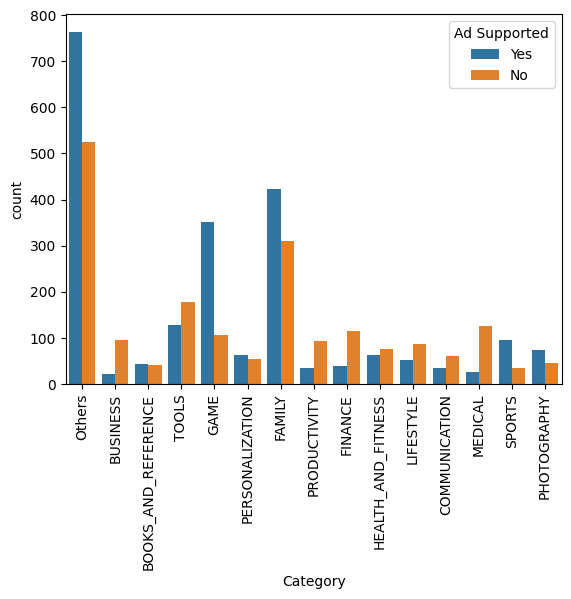

In [55]:
plt.xticks(rotation=90)
sns.countplot(x='Category',data=data,hue='Ad Supported')

most of the apps support adds

In [53]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Paid/Free',
       'Price', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice'],
      dtype='object')

to see which apps are editorial choice and shich are not

C:\Users\apoor\AppData\Local\Temp\ipykernel_9660\3449544979.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Editors Choice',y='Installs',data=data,palette='pastel')


<Axes: xlabel='Editors Choice', ylabel='Installs'>

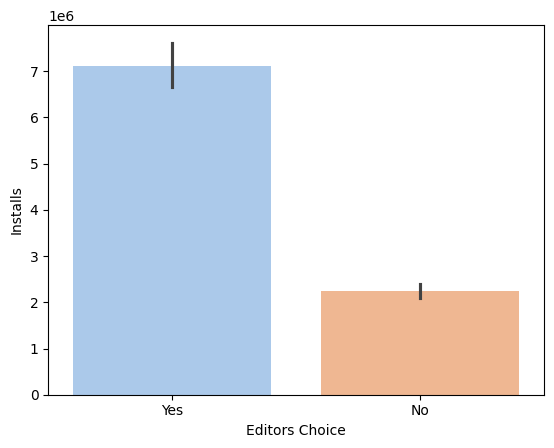

In [57]:
sns.barplot(x='Editors Choice',y='Installs',data=data,palette='pastel')

aprox 70% of apps are editorial choice apps

In [58]:
# What is the average rating of applications in different categories?
data.groupby('Category')['Rating'].mean()

Category
BOOKS_AND_REFERENCE    4.359505
BUSINESS               4.173910
COMMUNICATION          4.010194
FAMILY                 4.194421
FINANCE                4.114647
GAME                   4.284958
HEALTH_AND_FITNESS     4.268838
LIFESTYLE              4.117087
MEDICAL                4.151622
Others                 4.214315
PERSONALIZATION        4.294602
PHOTOGRAPHY            4.079390
PRODUCTIVITY           4.138241
SPORTS                 4.228381
TOOLS                  4.003463
Name: Rating, dtype: float64

In [59]:
# What is the correlation between application size and number of installations?
data[['Size','Installs']].corr()

,Size,Installs
Size,1.000000,0.332146
Installs,0.332146,1.000000


In [60]:
# Do higher-rated applications tend to have more reviews?
data[['Rating','Reviews']].corr()

,Rating,Reviews
Rating,1.000000,0.183772
Reviews,0.183772,1.000000


In [61]:
# Do more reviews mean more installs
data[['Reviews','Installs']].corr()

,Reviews,Installs
Reviews,1.000000,0.846474
Installs,0.846474,1.000000


In [62]:
# What is the relationship between the price of an application and its rating?
data[['Price','Rating']].corr()

,Price,Rating
Price,1.000000,-0.003775
Rating,-0.003775,1.000000
